<div style="text-align: left; background-color:#0A6EBD; font-family:Arial; color:white; border-color: #023468;padding: 12px; line-height:1.25;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 58px;border-style: solid;">ĐỒ ÁN LÝ THUYẾT CUỐI KỲ</div>

<div style="text-align: left; background-color:#82CAFA; font-family: Arial; color:white; padding: 12px; line-height:1.25;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px">Lập trình Khoa học Dữ liệu - Nhóm 20</div>

### Thành viên
|<center><div style="width:150px">MSSV</div><center>|<div style="width:290px">Họ và tên</div>|
|---------- |:-------------:|
| <center>21120103<center>  |  Phan Thảo Nguyên |
| <center>22120339<center>  |  Nguyễn Thị Anh Thi |
| <center>22120421<center>  |  Nguyễn Đoàn Minh Uyên | 

<div style="text-align: left; background-color:#5A96E3; font-family:Arial; color:white; padding: 12px; line-height:1.25; border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 30px; border-style: solid; border-color: #023468;">
    PHÂN TÍCH THÓI QUEN ĐỌC SÁCH THEO NHÂN KHẨU HỌC
</div>

## **Giới thiệu đề tài**

Đề tài **Phân tích thói quen đọc sách theo nhân khẩu học** tập trung nghiên cứu các yếu tố ảnh hưởng đến thói quen đọc sách, bao gồm sách in, sách nói, sách điện tử, báo chí và tạp chí. 

Dataset cung cấp thông tin chi tiết về tuổi (Age), giới tính (Sex), chủng tộc (Race), tình trạng hôn nhân (Marital status), trình độ học vấn (Education), tình trạng việc làm (Employment), và thu nhập (Income). Ngoài ra, dữ liệu còn ghi nhận số lượng sách đã đọc, loại hình sách được ưu tiên và tần suất đọc báo, tạp chí.

Nhóm chọn đề tài này vì thói quen đọc sách phản ánh văn hóa, sở thích, và mức độ tiếp cận tri thức của xã hội. Việc phân tích nhân khẩu học giúp chúng tôi hiểu rõ hơn về các yếu tố định hình hành vi đọc, từ đó đưa ra các nhận định về xu hướng đọc sách trong thời đại số hóa. Kết quả nghiên cứu có thể góp phần thúc đẩy văn hóa đọc và định hướng phát triển ngành xuất bản, giáo dục.

# **Data Exploration**

Import các thư viện cần thiết.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Đọc dữ liệu từ file csv

In [2]:
df = pd.read_csv('../data/data.csv')

In [3]:
df.head(10)

,Age,Sex,Race,Marital status?,Education,Employement,Incomes,How many books did you read during last 12months?,Read any printed books during last 12months?,Read any audiobooks during last 12months?,Read any e-books during last 12months?,"Last book you read, you…",Do you happen to read any daily news or newspapers?,Do you happen to read any magazines or journals?
0,66,Male,Refused,Divorced,College graduate,Retired,"$20,000 to under $30,000",97,Yes,No,Yes,Purchased the book,No,Yes
1,46,Male,Native American/American Indian,Married,High school graduate,Employed full-time,"Less than $10,000",97,Yes,Yes,Yes,Purchased the book,Yes,Yes
2,32,Male,Mixed race,Never been married,High school graduate,Employed full-time,"Less than $10,000",97,No,Yes,Yes,Borrowed the book from a friend or family member,Yes,Yes
3,27,Male,Mixed race,Married,High school graduate,Employed full-time,"$40,000 to under $50,000",97,Yes,No,Yes,Borrowed the book from a library,Yes,No
4,16,Female,Mixed race,Never been married,High school incomplete,Employed part-time,"$10,000 to under $20,000",97,Yes,Yes,No,Purchased the book,Yes,No
5,55,Female,Asian or Pacific Islander,Divorced,"Some college, no 4-year degree",Have own business/self-employed,"$40,000 to under $50,000",97,Yes,Yes,Yes,Purchased the book,No,No
6,63,Male,Black or African-American,Widowed,"Some college, no 4-year degree",Employed full-time,"$50,000 to under $75,000",97,Yes,No,No,Borrowed the book from a library,Yes,No
7,60,Female,Black or African-American,Married,College graduate,Retired,"$100,000 to under $150,000",97,Yes,No,No,Purchased the book,Yes,Yes
8,50,Female,Black or African-American,Married,Post-graduate training/professional school aft...,Employed part-time,"$75,000 to under $100,000",97,Yes,No,Yes,Purchased the book,Yes,No
9,29,Female,Black or African-American,Never been married,High school graduate,Employed part-time,"Less than $10,000",97,Yes,No,Yes,Borrowed the book from a friend or family member,No,No


## 1. DỮ LIỆU CÓ BAO NHIÊU DÒNG, BAO NHIÊU CỘT?

In [4]:
print(f"Kích thước dữ liệu : {df.shape}")

Kích thước dữ liệu : (2832, 14)


## 2. KHÁM PHÁ CÁC DÒNG DỮ LIỆU

### 2.1 Mỗi dòng có ý nghĩa gì? Có dòng nào có ý nghĩa khác với các dòng còn lại hay không? 

- Mỗi dòng là thông tin về người khảo sát và thói quen đọc sách của người này trong vòng 12 tháng.

- Không có dòng nào có ý nghĩa khác so với các dòng còn lại.

### 2.2 Có dòng nào bị trùng không? 

In [5]:
print(f"Số dòng bị trùng: {df.duplicated().sum()}")

Số dòng bị trùng: 1


Kết quả cho thấy rằng có 1 dòng bị trùng. Nhóm tiến hành xóa bỏ dòng bị trùng này.

In [6]:
df = df.drop_duplicates()

print(f"Kiểm tra lại số dòng bị trùng: {df.duplicated().sum()}")

Kiểm tra lại số dòng bị trùng: 0


## 3. KHÁM PHÁ CÁC CỘT DỮ LIỆU

### 3.1 Dữ liệu có những cột nào ? 

In [7]:
df.columns

Index(['Age', 'Sex', 'Race', 'Marital status?', 'Education', 'Employement',
       'Incomes', 'How many books did you read during last 12months?',
       'Read any printed books during last 12months?',
       'Read any audiobooks during last 12months?',
       'Read any e-books during last 12months?', 'Last book you read, you…',
       'Do you happen to read any daily news or newspapers?',
       'Do you happen to read any magazines or journals?'],
      dtype='object')

Như đã mô tả, dữ liệu bao gồm các câu hỏi khảo sát về thói quen đọc sách trong vòng 12 tháng, do đó cụm từ "last 12 months" xuất hiện khá nhiều. Mặc dù điều này giúp các cột có ý nghĩa rõ ràng, nhưng lại làm tên cột trở nên dài dòng, gây khó khăn cho việc trực quan hóa và thao tác dữ liệu.

Để khắc phục, nhóm quyết định đổi tên các cột cho ngắn gọn hơn nhưng vẫn giữ nguyên ý nghĩa, như sau:

In [8]:
df.rename(columns={
    'Age': 'age',
    'Sex': 'sex',
    'Race': 'race',
    'Marital status?': 'marital_status',
    'Education': 'education',
    'Employement': 'employment_status',
    'Incomes': 'income_level',
    'How many books did you read during last 12months?': 'books_read_last_12m',
    'Read any printed books during last 12months?': 'read_printed_books_last_12m',
    'Read any audiobooks during last 12months?': 'read_audiobooks_last_12m',
    'Read any e-books during last 12months?': 'read_ebooks_last_12m',
    'Last book you read, you…': 'last_book_read_source',
    'Do you happen to read any daily news or newspapers?': 'read_daily_news',
    'Do you happen to read any magazines or journals?': 'read_magazines_journals'
}, inplace=True)


Trong quá trình khám phá dữ liệu, nhóm nhận thấy rằng ngoài tên cột, nhiều giá trị trong tập dữ liệu cũng có tên rất dài. Điều này gây khó khăn cho việc trực quan hóa và làm việc với dữ liệu. Vì vậy, nhóm đã quyết định áp dụng cách tiếp cận tương tự như với tên cột, tiến hành thay đổi các giá trị này để ngắn gọn hơn, đồng thời vẫn giữ được ý nghĩa cần thiết.

Việc rút gọn không chỉ giúp tăng tính thẩm mỹ trong các biểu đồ và báo cáo mà còn cải thiện hiệu quả khi thao tác và trình bày dữ liệu, phù hợp hơn với mục tiêu phân tích.

In [9]:
value_mapping = {
    'Native American/American Indian' : 'Native American',
    'Asian or Pacific Islander' : 'Asian/Pacific Islander',
    'Black or African-American': 'Black/African-American',
    'High school graduate': 'High school',
    'College graduate': 'College', 
    'Some college, no 4-year degree': 'Some college',
    'High school incomplete' : 'Some high school',
    'Post-graduate training/professional school after college': 'Post-graduate',
    'Technical, trade or vocational school AFTER high school': 'Trade school',
    'Have own business/self-employed':'Self-employed',
    'Not employed for pay': 'Unemployed',
    'Purchased the book': 'Purchased',
    'Borrowed the book from a friend or family member': 'Borrowed from others',
    'Borrowed the book from a library': 'Borrowed from library',
    'Got the book some other way': 'Other sources',
    'Less than $10,000': '<$10k',
    '$10,000 to under $20,000': '$10k-20k',
    '$20,000 to under $30,000': '$20k-30k',
    '$30,000 to under $40,000': '$30k-40k',
    '$40,000 to under $50,000': '$40k-50k',
    '$50,000 to under $75,000': '$50k-75k',
    '$75,000 to under $100,000': '$75k-100k',
    '9$100,000 to under $150,000': '$100k-150k',
    '$100,000 to under $150,000': '$100k-150k' 
}

df.replace(value_mapping, inplace = True)

### 3.2 Ý nghĩa các cột dữ liệu

Mỗi cột dữ liệu có ý nghĩa như trong bảng dưới đây.

| **TÊN CỘT**                      | **Ý NGHĨA**                                                                                     |  
|-----------------------------------|-----------------------------------------------------------------------------------------------|  
| **age**                          | Tuổi của người tham gia khảo sát                                                              |  
| **sex**                          | Giới tính của người tham gia khảo sát                                                         |  
| **race**                         | Chủng tộc hoặc nguồn gốc dân tộc của người tham gia khảo sát                                  |  
| **marital_status**               | Tình trạng hôn nhân hiện tại của người tham gia khảo sát                                      |  
| **education**                    | Trình độ học vấn cao nhất mà người tham gia khảo sát đã hoàn thành                            |  
| **employment_status**            | Tình trạng việc làm của người tham gia khảo sát                                               |  
| **income_level**                 | Mức thu nhập của người tham gia khảo sát                                                     |  
| **books_read_last_12m**          | Tổng số sách mà người tham gia khảo sát đã đọc trong 12 tháng qua                             |  
| **read_printed_books_last_12m**  | Câu hỏi Có/Không: Người tham gia khảo sát có đọc sách in (sách vật lý) trong 12 tháng qua hay không |  
| **read_audiobooks_last_12m**     | Câu hỏi Có/Không: Người tham gia khảo sát có đọc sách nói trong 12 tháng qua hay không         |  
| **read_ebooks_last_12m**         | Câu hỏi Có/Không: Người tham gia khảo sát có đọc sách điện tử trong 12 tháng qua hay không     |  
| **last_book_read_source**        | Nguồn mà người tham gia khảo sát đã sử dụng để có được cuốn sách gần đây nhất họ đọc          |  
| **read_daily_news**              | Câu hỏi Có/Không: Người tham gia khảo sát có đọc tin tức hàng ngày hoặc báo chí hay không     |  
| **read_magazines_journals**      | Câu hỏi Có/Không: Người tham gia khảo sát có đọc tạp chí hoặc các ấn phẩm học thuật hay không |  



### 3.3 Kiểu dữ liệu hiện tại của các cột là gì? Có cột nào có kiểu dữ liệu không phù hợp hay không?

- Kiểu dữ liệu hiện tại của các cột:

In [10]:
column_types = df.dtypes
column_types

age                             int64
sex                            object
race                           object
marital_status                 object
education                      object
employment_status              object
income_level                   object
books_read_last_12m             int64
read_printed_books_last_12m    object
read_audiobooks_last_12m       object
read_ebooks_last_12m           object
last_book_read_source          object
read_daily_news                object
read_magazines_journals        object
dtype: object

Kiểu dữ liệu hiện tại đã phù hợp với ý nghĩa từng cột

### 3.4 Tỉ lệ dữ liệu bị thiếu của các cột

In [11]:
for col in df.columns:
    print(f'{col}: {df[col].isnull().mean()}')

age: 0.0
sex: 0.0
race: 0.0
marital_status: 0.0
education: 0.0
employment_status: 0.0
income_level: 0.0
books_read_last_12m: 0.0
read_printed_books_last_12m: 0.1377605086541858
read_audiobooks_last_12m: 0.1377605086541858
read_ebooks_last_12m: 0.1377605086541858
last_book_read_source: 0.1377605086541858
read_daily_news: 0.0
read_magazines_journals: 0.0


Nhận xét: Tỉ lệ thiếu này khá lớn và các thông tin thiếu đều trong cùng 1 dòng nên việc điền bằng bất kì phương pháp nào đều có thể dấn tới làm sai lệch dữ liệu. Nhóm quyết định xóa hết các dòng này.

In [12]:
# Xóa tất cả các dòng có giá trị thiếu
df = df.dropna()

# Kiểm tra lại để đảm bảo không còn giá trị thiếu
print(df.isnull().sum())

age                            0
sex                            0
race                           0
marital_status                 0
education                      0
employment_status              0
income_level                   0
books_read_last_12m            0
read_printed_books_last_12m    0
read_audiobooks_last_12m       0
read_ebooks_last_12m           0
last_book_read_source          0
read_daily_news                0
read_magazines_journals        0
dtype: int64


In [13]:
df.shape

(2441, 14)

## 4. THỐNG KÊ CHO CÁC CỘT KIỂU SỐ

### 4.1 Các cột kiểu số trong dữ liệu

In [14]:
numerical_columns = df.select_dtypes(include=['int64']).columns.tolist()
numerical_columns

['age', 'books_read_last_12m']

### 4.2 Tính chất của các cột

|**Tên cột**|**Phân phối**|
|-----------|-------------|
|age| Liên tục|
|books_read_last_12m| Rời rạc|

### 4.3 Tính toán giá trị thống kê. Dữ liệu có bất thường không? 

In [15]:
df.describe()

,age,books_read_last_12m
count,2441.000000,2441.000000
mean,46.520688,19.342483
std,18.488158,24.421249
min,16.000000,1.000000
25%,31.000000,4.000000
50%,47.000000,10.000000
75%,61.000000,24.000000
max,93.000000,97.000000


#### Nhận xét
##### Về độ tuổi (age)
- Độ tuổi trung bình là khoảng 47 tuổi
- Độ tuổi dao động từ 16 đến 93 tuổi, cho thấy sự đa dạng lớn về độ tuổi
- 50% người dùng có độ tuổi từ 31-61 tuổi (từ percentile 25% đến 75%)
- Độ lệch chuẩn khoảng 18.5 tuổi cho thấy sự phân tán khá lớn về độ tuổi

##### Về số sách đọc trong 12 tháng qua (books_read_last_12m)
- Trung bình mỗi người đọc khoảng 19 cuốn sách/năm
- Có người không đọc sách nào (min = 0) và có người đọc tới 97 cuốn (max)
- 50% số người đọc  cuốn sách hoặc ít hơn 10 (median = 10)
- Độ lệch chuẩn là 24 cuốn, cho thấy sự chênh lệch rất lớn trong thói quen đọc
- 75% người đọc 24 cuốn hoặc ít hơn, chỉ có 25% người đọc nhiều hơn 24 cuốn/năm

=> Phần lớn người được khảo sát là người trưởng thành trung niên. Thói quen đọc sách có sự phân hóa mạnh, với đa số đọc tương đối ít (<= 10 cuốn/năm) nhưng cũng có những người đọc rất nhiều (97 cuốn/năm).

### 4.4 Trực quan hóa phân phối dữ liệu

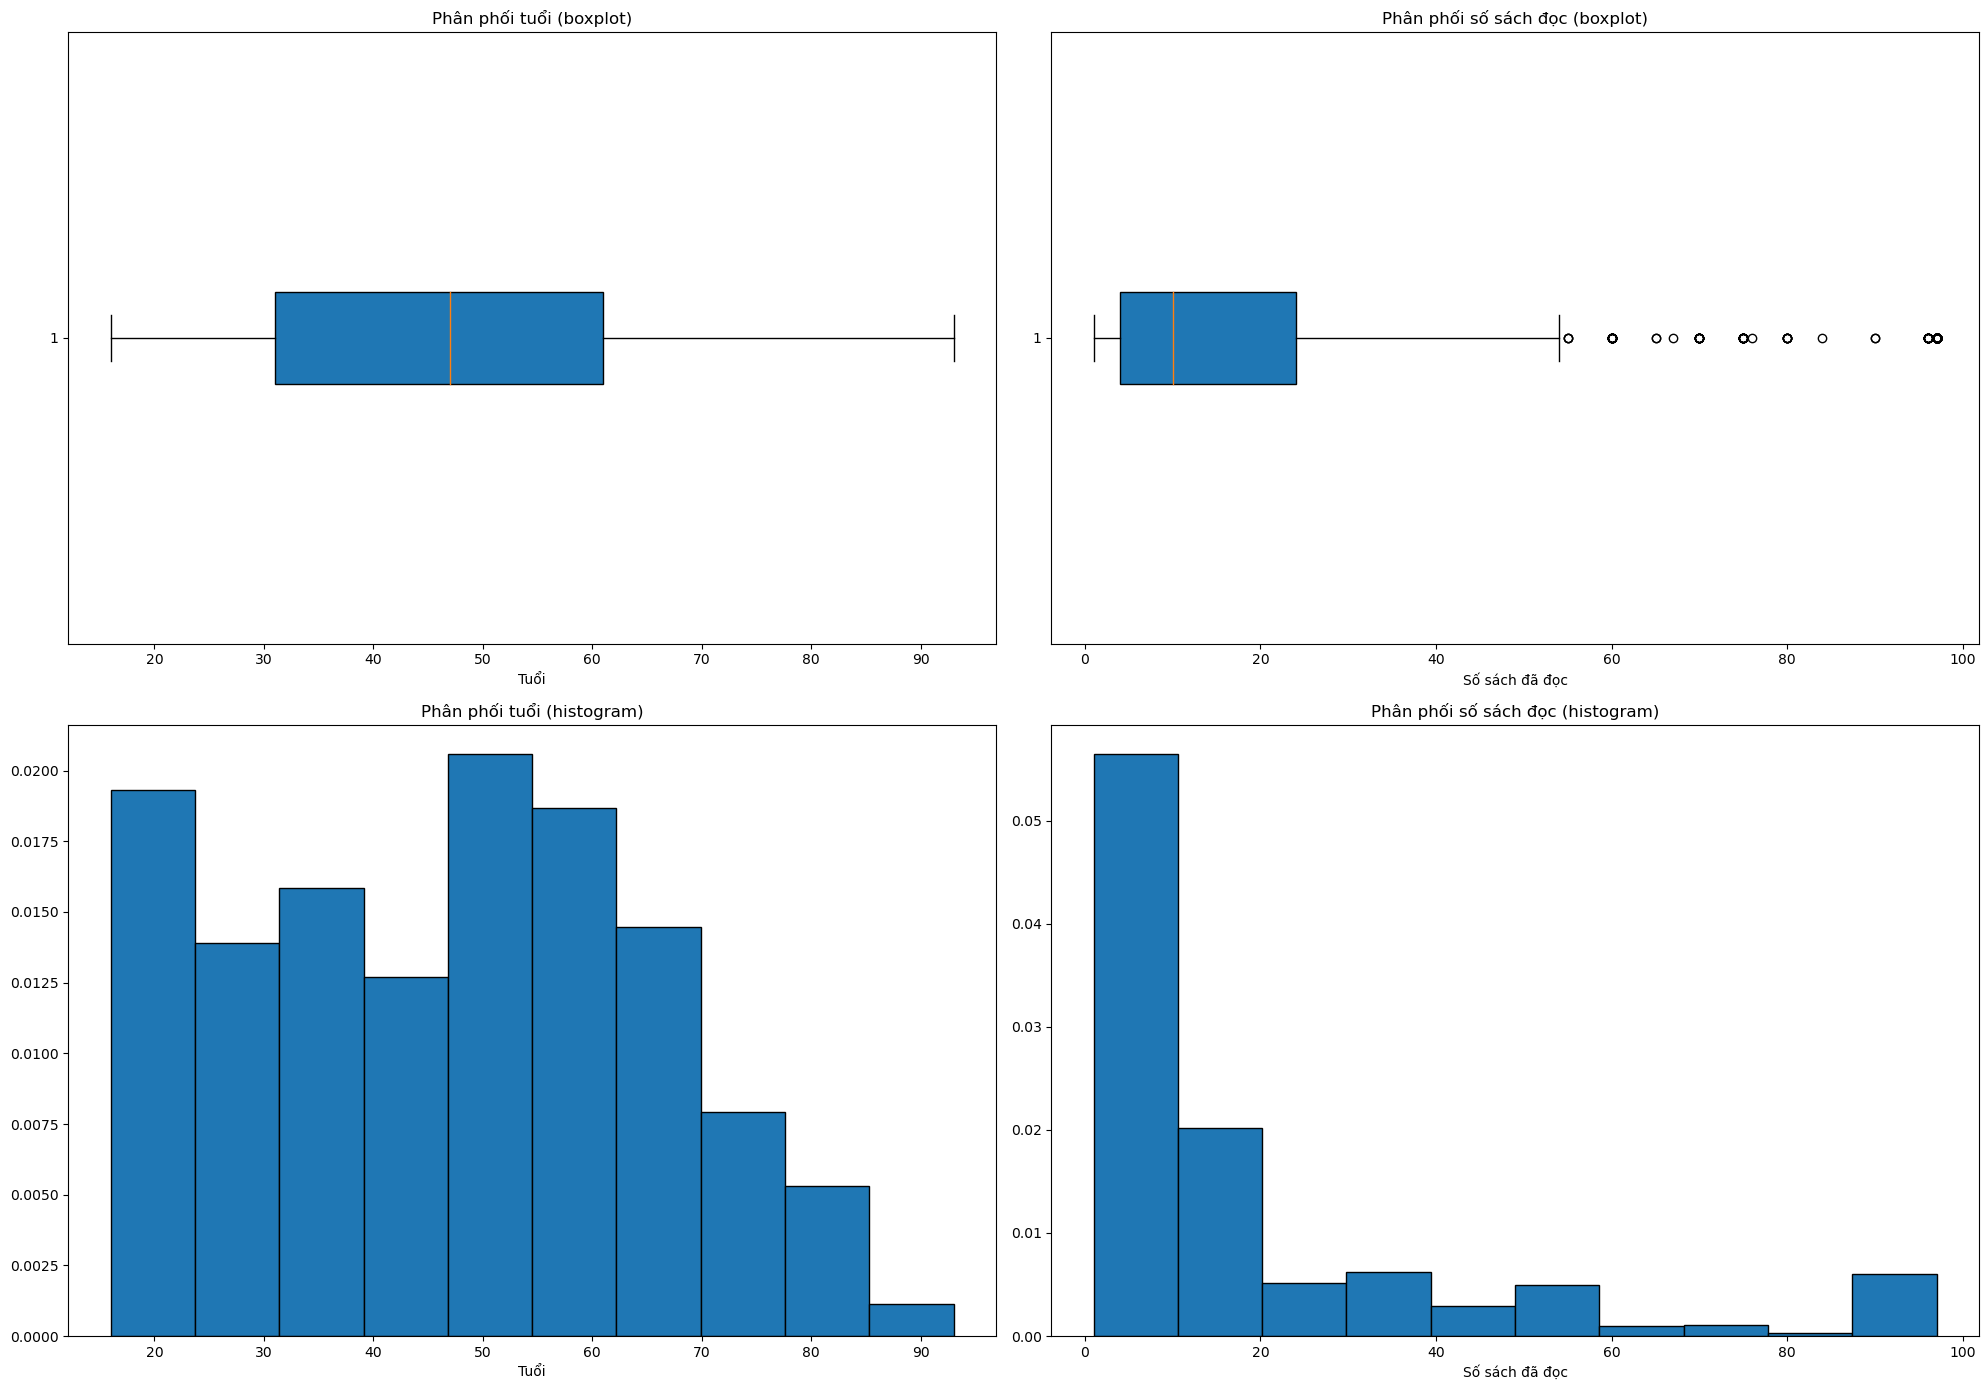

In [16]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 14))

# 1. Boxplot for 'Age'
axes[0][0].boxplot(df['age'], vert=False, patch_artist=True)
axes[0][0].set_title('Phân phối tuổi (boxplot)')
axes[0][0].set_xlabel('Tuổi')

# 2. Boxplot for 'books_read_last_12m'
axes[0][1].boxplot(df['books_read_last_12m'], vert=False, patch_artist=True)
axes[0][1].set_title('Phân phối số sách đọc (boxplot)')
axes[0][1].set_xlabel('Số sách đã đọc')

# 3. Historgram for 'Age'
axes[1][0].hist(df['age'], bins = 10, density = True, edgecolor='black')
axes[1][0].set_title('Phân phối tuổi (histogram)')
axes[1][0].set_xlabel('Tuổi')

# 4. Histogram for 'books_read_last_12m'
axes[1][1].hist(df['books_read_last_12m'], bins = 10, density = True, edgecolor='black')
axes[1][1].set_title('Phân phối số sách đọc (histogram)')
axes[1][1].set_xlabel('Số sách đã đọc')

plt.tight_layout()
plt.show()

#### Nhận xét
##### Về phân phối tuổi:
- Phân phối tương đối cân đối, thể hiện qua hộp boxplot khá đều hai bên đường trung vị
- Trung vị tuổi khoảng 48 tuổi (đường thẳng cam trong hộp)
- Phần lớn dữ liệu (50%) nằm trong khoảng từ 32-62 tuổi (chiều dài của hộp)
- Không có nhiều điểm ngoại lai, cho thấy phân phối tuổi khá tự nhiên
- Dữ liệu trải dài từ khoảng 16-93 tuổi (hai đầu của râu)
##### Về phân phối số sách đã đọc:
- Phân phối lệch hẳn về bên phải (skewed right)
- Đa số người đọc ít sách (histogram dồn về phía trái)
- Trung vị khoảng 10 cuốn sách/năm
- Có nhiều điểm ngoại lai (outliers) ở phía phải, thể hiện bằng các chấm tròn
- Một số người đọc rất nhiều sách (lên đến gần 100 cuốn/năm)
- 50% dữ liệu tập trung ở mức thấp (từ khoảng 2-20 cuốn)

=> Trong khi độ tuổi phân phối khá đều và bình thường, thói quen đọc sách lại có sự phân hóa rất lớn. Đa số người đọc ít sách, chỉ một số ít người đọc nhiều sách bất thường.

## 5. THỐNG KÊ CHO CÁC CỘT KIỂU PHÂN LOẠI

### 5.1 Các cột kiểu categorical

In [17]:
categorical_columns = df.select_dtypes(include='object').columns.tolist()
categorical_columns

['sex',
 'race',
 'marital_status',
 'education',
 'employment_status',
 'income_level',
 'read_printed_books_last_12m',
 'read_audiobooks_last_12m',
 'read_ebooks_last_12m',
 'last_book_read_source',
 'read_daily_news',
 'read_magazines_journals']

### 5.2 Tính chất của các cột

|**Tên cột**|**Tính chất**|
|-----------|-------------|
|sex| Không có thứ tự|
|race| Không có thứ tự|
|marital_status| Không có thứ tự|
|education| Không có thứ tự|
|employment| Không có thứ tự|
|income_level| Có thứ tự|
|read_printed_books_last_12m| Không có thứ tự|
|read_audiobooks_last_12m| Không có thứ tự|
|read_ebooks_last_12m| Không có thứ tự|
|last_book_read_source| Không có thứ tự|
|read_daily_news| Không có thứ tự|
|read_magazines_journals| Không có thứ tự|

### 5.3 Các giá trị của từng cột

In [18]:
categorical_columns = df.select_dtypes(include=['object']).columns
unique_values_categorical = {col: df[col].unique()[:5] for col in categorical_columns}
num_unique_values = df[categorical_columns].nunique()
print("Số lượng giá trị khác nhau trong mỗi cột phân loại:")
print(num_unique_values)


Số lượng giá trị khác nhau trong mỗi cột phân loại:
sex                            2
race                           8
marital_status                 8
education                      8
employment_status              8
income_level                   9
read_printed_books_last_12m    3
read_audiobooks_last_12m       3
read_ebooks_last_12m           3
last_book_read_source          6
read_daily_news                3
read_magazines_journals        3
dtype: int64


In [19]:
print("\nMột vài giá trị khác nhau trong các cột phân loại:")
for col, values in unique_values_categorical.items():
    print(f"{col}: {values}")


Một vài giá trị khác nhau trong các cột phân loại:
sex: ['Male' 'Female']
race: ['Refused' 'Native American' 'Mixed race' 'Asian/Pacific Islander'
 'Black/African-American']
marital_status: ['Divorced' 'Married' 'Never been married' 'Widowed' 'Don’t know']
education: ['College' 'High school' 'Some high school' 'Some college' 'Post-graduate']
employment_status: ['Retired' 'Employed full-time' 'Employed part-time' 'Self-employed'
 'Student']
income_level: ['$20k-30k' '<$10k' '$40k-50k' '$10k-20k' '$50k-75k']
read_printed_books_last_12m: ['Yes' 'No' 'Don’t know']
read_audiobooks_last_12m: ['No' 'Yes' 'Don’t know']
read_ebooks_last_12m: ['Yes' 'No' 'Don’t know']
last_book_read_source: ['Purchased' 'Borrowed from others' 'Borrowed from library'
 'Other sources' '8']
read_daily_news: ['No' 'Yes' 'Don’t know']
read_magazines_journals: ['Yes' 'No' 'Don’t know']


Nhận xét: Trong dữ liệu, ngoài các giá trị null, ta nhận thấy còn có 1 số giá trị không mang lại nhiều ý nghĩa như giá trị `Don't know`, `Refused`, `None` và 2 giá trị `9`, `8` (trong cột **last_book_read_source**), nhóm quyết định sẽ xóa các dòng này. 

In [20]:
df = df[~df.isin(["Don’t know", 'Refused', 'None', '8', '9']).any(axis=1)]

In [21]:
# Kiểm tra lại số dòng, sốt cột dữ liệu sau khi xử lý
num_rows, num_cols = df.shape
num_rows, num_cols

(2082, 14)

### 5.5 Trực quan hóa phân phối dữ liệu

In [22]:
# Tạo 1 từ điển lưu các giá trị và số giá trị trong từng cột dữ liệu kiểu phân loại
def create_category_dict(df, categorical_columns):  
    category_dict = {}  
    
    for col in categorical_columns:  
        value_counts = df[col].value_counts()  
        
        counts = value_counts.to_dict() 
        
        values = value_counts.index.tolist()
        
        category_dict[col] = {  
            'values': values,  
            'counts': counts  
        }  
    
    return category_dict  

category_dict = create_category_dict(df, categorical_columns)

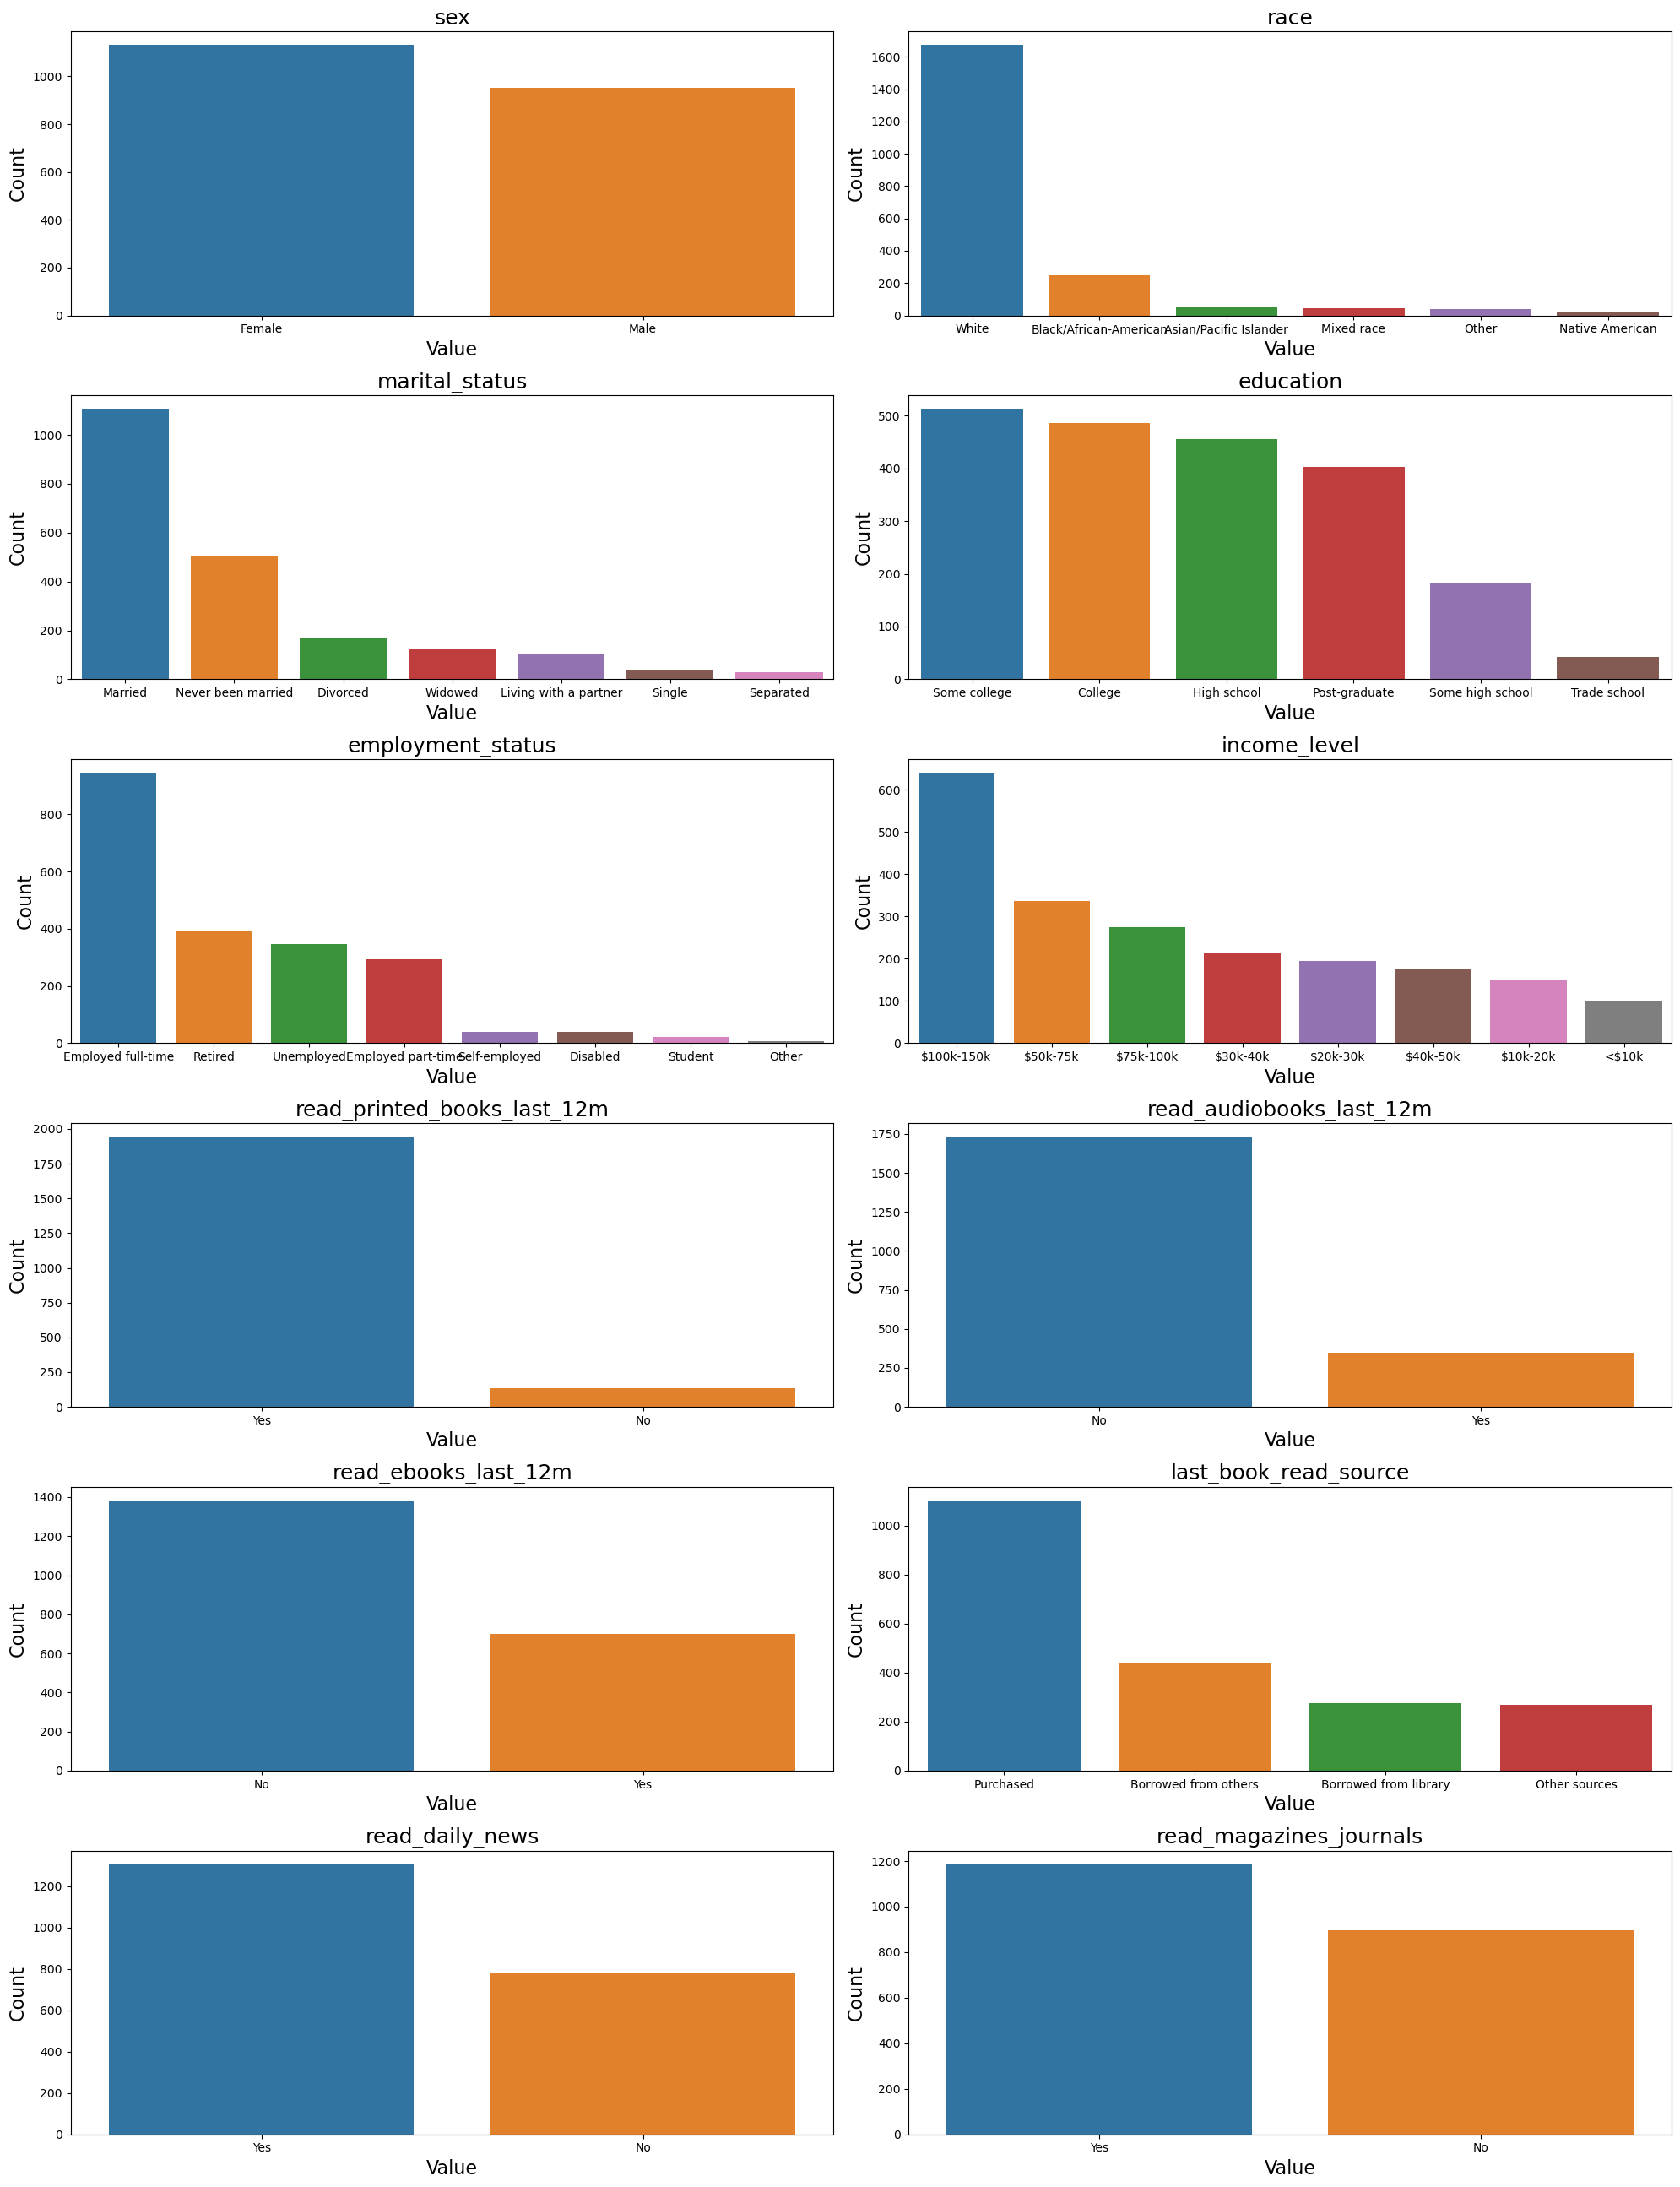

In [23]:
# Trực quan hóa phân phối dữ liệu cho các cột kiểu phân loại
def plot_from_dict(category_dict):
    fig, axes = plt.subplots(6, 2, figsize=(20, 26))
    axes = axes.flatten()  
    
    for idx, (col, data) in enumerate(category_dict.items()):
        values = data['values']
        counts = list(data['counts'].values())  
        
        sns.barplot(
            x=values,
            y=counts,
            ax=axes[idx],
            hue=values, 
            legend=False 
        )
        
        axes[idx].set_title(f"{col}", fontsize=18)
        axes[idx].set_xlabel('Value', fontsize=16)
        axes[idx].set_ylabel('Count', fontsize=16)
        axes[idx].tick_params(axis='x')
    
    for idx in range(len(category_dict), 6 * 2):
        axes[idx].axis('off')
        
    plt.tight_layout()
    plt.show()

plot_from_dict(category_dict)


## 6. LƯU DỮ LIỆU ĐÃ ĐƯỢC TIỀN XỬ LÝ

In [24]:
df.to_csv('../data/cleaned_data.csv', index=False)